<a href="https://colab.research.google.com/github/Watcharinkh/Machine-Learning/blob/main/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basic

In [9]:
pip install scikit-learn

In [22]:
from sklearn import datasets
iris_dataset=datasets.load_iris()
print(iris_dataset['target'])
print(iris_dataset['target_names'])
print(iris_dataset['DESCR'])
print(iris_dataset['data'][0:10])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ==

In [29]:
from sklearn import datasets
digit_dataset=datasets.load_digits()
print(digit_dataset['DESCR'])
print(iris_dataset['data'])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

KeyError: ignored

In [1]:
print(iris_dataset['images'].shape)

NameError: ignored

##SplitData

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris_dataset=load_iris()

x_t,x_s,y_t,y_s = train_test_split(iris_dataset['data'],iris_dataset['target'],random_state=0)

print(x_t.shape)
print(x_s.shape)


(112, 4)
(38, 4)


##SplitDataset

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris_dataset=load_iris()
x_train,x_test,y_train,y_test = train_test_split(iris_dataset["data"],iris_dataset["target"],test_size=0.2,random_state=0)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

#150 
#train 80% = 120
#test 20% = 30

(120, 4)
(30, 4)
(120,)
(30,)


#Face Recognition

##Face

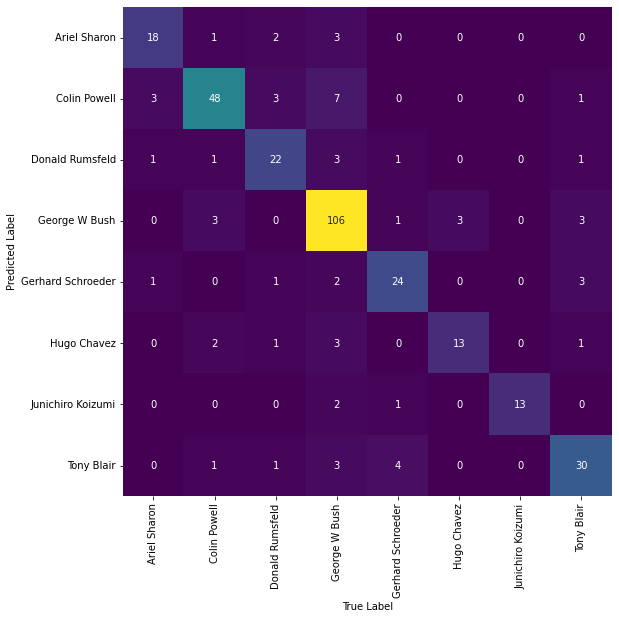

In [ ]:
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.decomposition import PCA 
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
faces=fetch_lfw_people(min_faces_per_person=60)

# print(faces.target_names)
# print(faces.images.shape)
# fig,ax=plt.subplots(3,5)
# for i,axi in enumerate(ax.flat):
#     axi.imshow(faces.images[i],cmap='bone')
#     axi.set(xticks=[],yticks=[])
#     axi.set_ylabel(faces.target_names[faces.target[i]].split()[-1],color='black')
# plt.show()

pca=PCA(n_components=150,svd_solver='randomized', whiten=True)
svc=SVC(kernel="rbf",class_weight="balanced")
model=make_pipeline(pca,svc)
x_train,x_test,y_train,y_test=train_test_split(faces.data,faces.target,random_state=45)

#parameter
param_grid={'svc__C':[1,5,10,50],'svc__gamma':[0.0001,0.005,0.001,0.005]}
grid=GridSearchCV(model,param_grid)

#train
grid.fit(x_train,y_train)
# print(grid.best_params_)
# print(grid.best_estimator_)

model=grid.best_estimator_

yfit=model.predict(x_test)
# fig,ax=plt.subplots(4,6)
# for i,axi in enumerate(ax.flat):
#     axi.imshow(x_test[i].reshape(62,47),cmap='bone')
#     axi.set(xticks=[],yticks=[])
#     axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
#     color='black' if yfit[i] == y_test[i] else 'blue')
#     # fig.subtitle('Predicted Name')
# plt.show()

# print(classification_report(y_test,yfit,target_names=faces.target_names))

plt.figure(figsize=(9,9))
mat=confusion_matrix(y_test,yfit)
sns.heatmap(mat.T,square=True,
annot=True,fmt='d',cbar=False,
cmap='viridis',
xticklabels=faces.target_names,
yticklabels=faces.target_names
)
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.show()

##Kernel

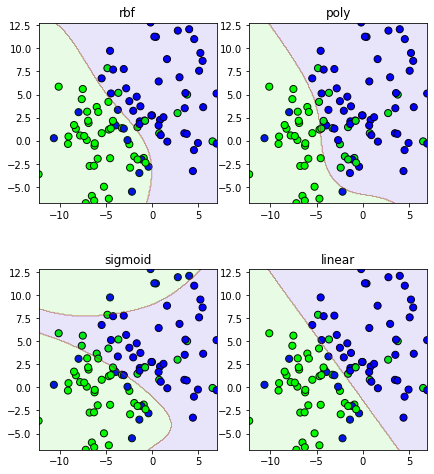

In [ ]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
from  sklearn.svm import SVC

X,z = make_blobs(n_samples=100,n_features=2,cluster_std=4,centers=2,random_state=3)
mx,my = np.meshgrid(np.linspace(X[:,0].min(),X[:,0].max(),200),np.linspace(X[:,1].min(),X[:,1].max(),200))
mX = np.stack([mx.ravel(),my.ravel()],1)
plt.figure(figsize=[6,7])
kernel = ['rbf','poly','sigmoid','linear']
for i in range(4):
    svc = SVC(kernel=kernel[i])
    svc.fit(X,z)
    mz = svc.predict(mX).reshape(200,200)
    plt.subplot(2,2,i+1,aspect=1,xlim=[X[:,0].min(),X[:,0].max()],ylim=[X[:,1].min(),X[:,1].max()])
    plt.scatter(X[:,0],X[:,1],s=50,c=z,edgecolor='k',cmap='brg')
    plt.contourf(mx,my,mz,alpha=0.1,cmap='brg')
    plt.title(kernel[i])
plt.tight_layout()
plt.show()

##TuningParameter

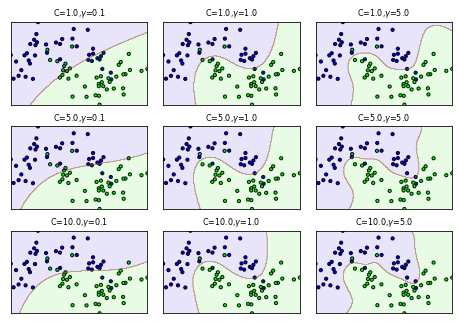

In [ ]:
from sklearn.datasets import make_moons
import numpy as np
import matplotlib.pyplot as plt
from  sklearn.svm import SVC

X,z = make_moons(n_samples=80,shuffle=0,noise=0.25,random_state=0)
mx,my = np.meshgrid(np.linspace(X[:,0].min(),X[:,0].max(),200),np.linspace(X[:,1].min(),X[:,1].max(),200))
mX = np.stack([mx.ravel(),my.ravel()],1)
plt.figure(figsize=[6.5,4.5])
for i,C in enumerate([1,5,10]):
    for j,gamma in enumerate([0.1,1,5]):
        svc = SVC(C=C,gamma=gamma)
        svc.fit(X,z)
        mz = svc.predict(mX).reshape(200,200)
        plt.subplot2grid((3,3),(i,j),xlim=[X[:,0].min(),X[:,0].max()],ylim=[X[:,1].min(),X[:,1].max()],xticks=[],yticks=[],aspect=1)
        plt.scatter(X[:,0],X[:,1],s=10,c=z,edgecolor='k',cmap='brg')
        plt.contourf(mx,my,mz,alpha=0.1,cmap='brg')
        plt.title('C=%.1f,$\\gamma$=%.1f'%(C,gamma),size=8)
plt.tight_layout()
plt.show()

#K-Means

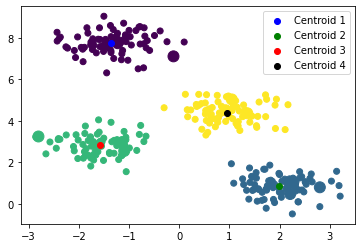

In [ ]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans

x,y=make_blobs(n_samples=300,centers=4,cluster_std=0.5,random_state=0)

#new point
x_test,y_test=make_blobs(n_samples=10,centers=4,cluster_std=0.5,random_state=0)

# print(x[:,1])
# print(y.shape)
model=KMeans(n_clusters=4)
model.fit(x)
y_pred=model.predict(x)
y_pred_new=model.predict(x_test)
centers=model.cluster_centers_

# print(centers)
plt.scatter(x[:,0],x[:,1],c=y_pred)
plt.scatter(x_test[:,0],x_test[:,1],c=y_pred_new,s=120)
plt.scatter(centers[0,0],centers[0,1],c='blue',label="Centroid 1")
plt.scatter(centers[1,0],centers[1,1],c='green',label="Centroid 2")
plt.scatter(centers[2,0],centers[2,1],c='red',label="Centroid 3")
plt.scatter(centers[3,0],centers[3,1],c='black',label="Centroid 4")
plt.legend(frameon=True)
plt.show()

#KNN

##KNN-Diabetes

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


#Read Data
df=pd.read_csv("diabetes.csv")
# data
x=df.drop("Outcome",axis=1).values
# outcome data
y=df['Outcome'].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4)

knn=KNeighborsClassifier(n_neighbors=8)
#train
knn.fit(x_train,y_train)

#prediction
y_pred=knn.predict(x_test)

print(pd.crosstab(y_test,y_pred,rownames=['Actually'],colnames=['Prediction'],margins=True))

Prediction    0   1  All
Actually                
0           180  27  207
1            53  48  101
All         233  75  308


##KNNDemo

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,accuracy_score

iris_dataset=load_iris()
x_train,x_test,y_train,y_test=train_test_split(iris_dataset['data'],iris_dataset['target'],test_size=0.4,random_state=0)


#Model
knn=KNeighborsClassifier(n_neighbors=1)

#training
knn.fit(x_train,y_train)

#prediction
y_pred=knn.predict(x_test)

# print(classification_report(y_test,y_pred,target_names=iris_dataset['target_names']))
print("ความแม่นยำ = ",accuracy_score(y_test,y_pred)*100)

ความแม่นยำ =  91.66666666666666


##MLModel

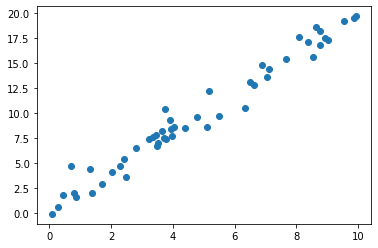

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
rng=np.random

#การจำลองข้อมูล
x=rng.rand(50)*10
y=2*x+rng.randn(50)

#linear regression model
model=LinearRegression()
x_new =x.reshape(-1,1)

#train
model.fit(x_new,y)

#test model
xfit=np.linspace(-1,11)
xfit_new=xfit.reshape(-1,1)

yfit=model.predict(xfit_new)

#analysis model & result
plt.scatter(x,y)
# plt.plot(xfit,yfit)
plt.show()

#Linear Regression

##Binary

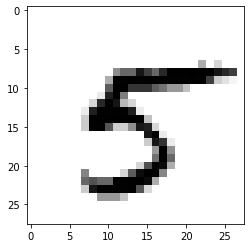

Actual =  True
Predict =  False


In [ ]:
from scipy.io import loadmat
import numpy as np
from sklearn.linear_model import SGDClassifier
import matplotlib.pyplot as plt  

def displayImage(x):
    plt.imshow(x.reshape(28,28),cmap=plt.cm.binary,interpolation="nearest")
    plt.show()

def displayPredict(clf,actually_y,x):
    print("Actual = " ,actually_y)
    print("Predict = " , clf.predict([x])[0])


mnist_raw=loadmat("mnist-original.mat")
mnist={
    "data":mnist_raw["data"].T,
    "target":mnist_raw["label"][0]
}

x,y=mnist['data'],mnist['target']
x_train,x_test,y_train,y_test=x[:60000],x[60000:],y[:60000],y[60000:]


y_train_0=(y_train==0)

sgd=SGDClassifier()
sgd.fit(x_train,y_train_0)

predict_data = 5500

displayImage(x_test[5500])
displayPredict(sgd,y_train_0[predict_data],x_test[predict_data])


##BinarySGD

In [ ]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt  
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
import itertools
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

def displayConfusionMatrix(cm,cmap=plt.cm.GnBu):
    classes=["Other Number","Number 5"]
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title("Confusion Matrix")
    plt.colorbar()
    trick_marks=np.arange(len(classes))
    plt.xticks(trick_marks,classes)
    plt.yticks(trick_marks,classes)
    thresh=cm.max()/2
    for i , j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,format(cm[i,j],'d'),
        horizontalalignment='center',
        color='white' if cm[i,j]>thresh else 'black')

    plt.tight_layout()
    plt.ylabel('Actually')
    plt.xlabel('Prediction')
    plt.show()

def displayImage(x):
    plt.imshow(
    x.reshape(28,28),
    cmap=plt.cm.binary,
    interpolation="nearest")
    plt.show()

def displayPredict(clf,actually_y,x):
    print("Actually = ",actually_y)
    print("Prediction = ",clf.predict([x])[0])

mnist_raw=loadmat("mnist-original.mat")
mnist={
    "data":mnist_raw["data"].T,
    "target":mnist_raw["label"][0]
}

x,y=mnist["data"],mnist["target"]
# Training & Test Set
# class 0 - 9
x_train , x_test,y_train,y_test= x[:60000],x[60000:],y[:60000],y[60000:]

# class 5 , ไม่ใช่ class 5
# ข้อมูลค่า 5000  -> model -> class 0 หรือไม่ ? true : false

# y_train =[0,0,.......,9...,9]
predict_number = 5500
y_train_5 = (y_train==5)
y_test_5 = (y_test==5)

# y_train_0 =[true,true,.......,false...,false]

sgd_clf = SGDClassifier()
sgd_clf.fit(x_train,y_train_5)

y_train_pred = cross_val_predict(sgd_clf,x_train,y_train_5,cv=3)
cm=confusion_matrix(y_train_5,y_train_pred)

y_test_pred=sgd_clf.predict(x_test)

# classes=['Other Number','Number 5']
# print(classification_report(y_test_5,y_test_pred,target_names=classes))
print("Accuracy Score = ",accuracy_score(y_test_5,y_test_pred)*100)

Accuracy Score =  97.3


##MLPredictWeather

In [ ]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

dataset=pd.read_csv("weather.csv")

# train & test set
x = dataset["MinTemp"].values.reshape(-1,1)
y = dataset["MaxTemp"].values.reshape(-1,1)

# 80% - 20%
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.2,random_state=0)

#training
model=LinearRegression()
model.fit(x_train,y_train)

#test
y_pred=model.predict(x_test)

# compare true data & predict data
df=pd.DataFrame({'Actually':y_test.flatten(),'Predicted':y_pred.flatten()})

print("MAE = ",metrics.mean_absolute_error(y_test,y_pred))
print("MSE = ",metrics.mean_squared_error(y_test,y_pred))
print("RMSE = ",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("Score = ",metrics.r2_score(y_test,y_pred))

MAE =  3.5094353112899594
MSE =  17.011877668640622
RMSE =  4.124545753006096
Score =  0.6412725627854521


#Naive Bay Classification

##NaiveBay

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
#load dataset
iris=load_iris()
#assign attribute , target
x=iris['data']
y=iris['target']

# train , test 
x_train,x_test,y_train,y_test=train_test_split(x,y)

#model
model=GaussianNB()
#train
model.fit(x_train,y_train)

#prediction
y_pred=model.predict(x_test)

#Accuracy Score
print("Accuracy = ",accuracy_score(y_test,y_pred))

Accuracy =  0.9210526315789473


##NaiveBayAdult

In [ ]:
#Dataset : https://www.kaggle.com/uciml/adult-census-income
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

def cleandata(dataset):
    for column in dataset.columns:
        if dataset[column].dtype == type(object):
            le = LabelEncoder()
            dataset[column]=le.fit_transform(dataset[column])
    return dataset

def split_feature_class(dataset,feature):
    features=dataset.drop(feature,axis=1) # เอาข้อมูลทั้งหมดยกเว้น income
    labels=dataset[feature].copy() #เอาเฉพาะข้อมูล income
    return features,labels

dataset=pd.read_csv("adult.csv")
dataset=cleandata(dataset)

#split train ,test
training_set,test_set=train_test_split(dataset,test_size=0.2)

#train 
train_features,train_labels=split_feature_class(training_set,"income")

#test
test_features,test_labels=split_feature_class(test_set,"income")

#model
model=GaussianNB()
model.fit(train_features,train_labels)

#predict
clf_pred=model.predict(test_features)

print("Accuracy = ",accuracy_score(test_labels,clf_pred))

Accuracy =  0.7969085883918517


#Neural Network

##Characters

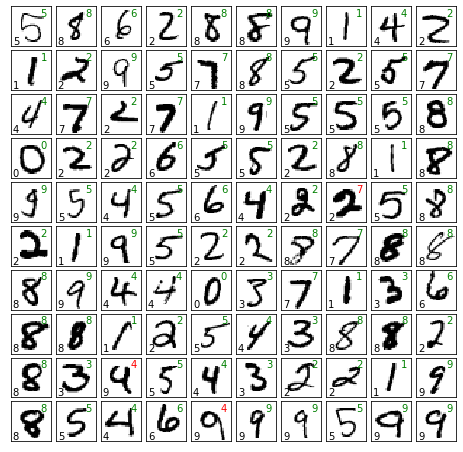

In [ ]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neural_network import MLPClassifier
mnist_raw=loadmat("mnist-original.mat")
mnist={
    "data":mnist_raw["data"].T,
    "target":mnist_raw["label"][0]
}
shuffle=np.random.permutation(70000)

x,y=mnist["data"],mnist["target"]
# Training & Test Set
# class 0 - 9
x,y=x[shuffle],y[shuffle]
x_train , x_test,y_train,y_test= x[:60000],x[60000:],y[:60000],y[60000:]

mlp=MLPClassifier()
mlp.fit(x_train,y_train)

# print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)
# fig,ax=plt.subplots(10,10,
# figsize=(8,8),
# subplot_kw={'xticks':[],'yticks':[]},
# gridspec_kw=dict(hspace=0.1,wspace=0.1)
# )
# for i, axi in enumerate(ax.flat):
#     axi.imshow(x_train[i].reshape(28,28),cmap='binary',interpolation='nearest')
#     axi.text(0.05,0.05,str(int(y_train[i])),transform=axi.transAxes,color='black')
# plt.show()

# print(mlp.score(x_train,y_train))
# print(mlp.score(x_test,y_test))

y_pred=mlp.predict(x_test)

fig,ax=plt.subplots(10,10,
figsize=(8,8),
subplot_kw={'xticks':[],'yticks':[]},
gridspec_kw=dict(hspace=0.1,wspace=0.1)
)
for i, axi in enumerate(ax.flat):
    axi.imshow(x_test[i].reshape(28,28),cmap='binary',interpolation='nearest')
    axi.text(0.05,0.05,str(int(y_test[i])),transform=axi.transAxes,color='black')
    axi.text(0.75,0.75,str(int(y_pred[i])),transform=axi.transAxes,color='green' 
    if y_pred[i]==y_test[i] else 'red')
plt.show()

##MLP.

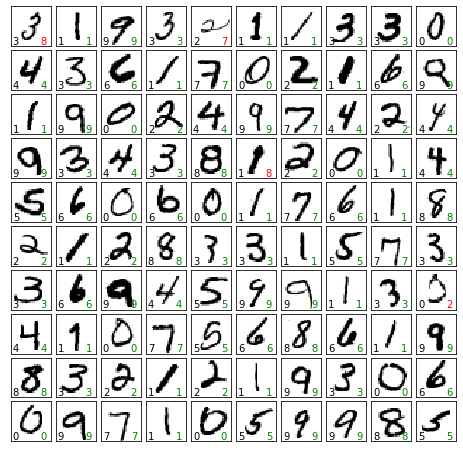

In [ ]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import numpy as np
mnist_raw=loadmat("mnist-original.mat")
mnist={
    "data":mnist_raw["data"].T,
    "target":mnist_raw["label"][0]
}

x,y=mnist["data"],mnist["target"]
#shuffle data
shuffle=np.random.permutation(70000)
x,y=x[shuffle],y[shuffle]
x_train , x_test,y_train,y_test= x[:60000],x[60000:],y[:60000],y[60000:]


#create model 
model=MLPClassifier()
model.fit(x_train,y_train)

y_pred=model.predict(x_test)

fig,ax=plt.subplots(10,10,
figsize=(8,8),
subplot_kw={'xticks':[],'yticks':[]},
gridspec_kw=dict(hspace=0.1,wspace=0.1))

#display image data after training & prediction
for i , axi in enumerate(ax.flat):
    #display test image data
    axi.imshow(x_test[i].reshape(28,28),cmap='binary',interpolation='nearest')
    #display text true number image data
    axi.text(0.05,0.05,str(int(y_test[i])),transform=axi.transAxes,color="black")
    ##display text predict number image data
    axi.text(0.75,0.05,str(int(y_pred[i])),transform=axi.transAxes,
    color="green" if y_pred[i] == y_test[i] else "red")
plt.show()


#PCA

##PCABasic

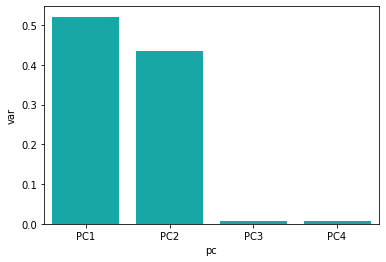

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
x,y=make_blobs(n_samples=100,n_features=10)

pca=PCA(n_components=4)
pca.fit_transform(x)

df=pd.DataFrame({'var':pca.explained_variance_ratio_,'pc':['PC1','PC2','PC3','PC4']})
sb.barplot(x='pc',y='var',data=df,color='c')
plt.show()

##PCAIris

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import seaborn as sb
from sklearn.decomposition import PCA

#load data
iris=sb.load_dataset('iris')
x=iris.drop('species',axis=1) # 4 
y=iris['species']

#pca
pca=PCA(n_components=3)
x_pca=pca.fit_transform(x)

# add before , after
x['PCA1']=x_pca[:,0]
x['PCA2']=x_pca[:,1]
x['PCA3']=x_pca[:,2]

x_train,x_test,y_train,y_test=train_test_split(x,y)

#Complete Data
x_train=x_train.loc[:,['PCA1','PCA2','PCA3']]
x_test=x_test.loc[:,['PCA1','PCA2','PCA3']]

model=GaussianNB()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

#Accuracy Score 94%
print("Accuracy = ",accuracy_score(y_test,y_pred))

Accuracy =  0.868421052631579


##PCAMnist

43


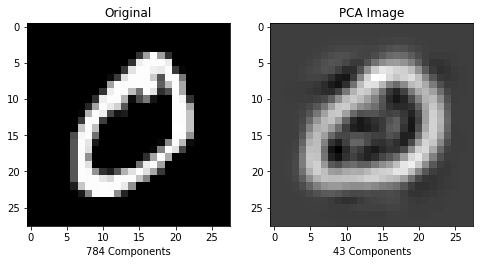

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from scipy.io import loadmat
import matplotlib.pyplot as plt

mnist_raw=loadmat("mnist-original.mat")
mnist={
    "data":mnist_raw["data"].T,
    "target":mnist_raw["label"][0]
}
x_train, x_test, y_train,y_test = train_test_split(mnist["data"], mnist["target"], random_state=0)


pca=PCA(.80)
data=pca.fit_transform(x_train)
result=pca.inverse_transform(data)
print(pca.n_components_)
#show image
plt.figure(figsize=(8,4))
#image feature 784
plt.subplot(1,2,1)
plt.imshow(mnist["data"][0].reshape(28,28),cmap=plt.cm.gray,interpolation="nearest")
plt.xlabel("784 Components")
plt.title("Original")
#image feature 95% -> 154 
plt.subplot(1,2,2)
plt.imshow(result[0].reshape(28,28),cmap=plt.cm.gray,interpolation="nearest")
plt.xlabel("43 Components")
plt.title("PCA Image")
plt.show()